In [1]:
#Ejemplo 2.1 
def vectorfield(w, t, p):
    """
    Definimos las ecuaciones diferenciales para el sistema de doble masa-resorte.
    Arguments:
        w : Vector del estado de las variables 
                  w = [x1,y1,x2,y2]
        t :  Tiempo
        p :  Vector de los parametros:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    #Creamos f = (x1',y1',x2',y2')
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [2]:
#Usamos la funcion ODEINT para resolver las ecuaciones diferenciales definidas por el vector
from scipy.integrate import odeint
import numpy as np

#Valor de los parametros
# Masas:
m1 = 1.0
m2 = 1.0
# Constante del resorte
k1 = 6.0
k2 = 4.0
# Longitudes naturales
L1 = 0
L2 = 0
# Coeficientes de fricción
b1 = 0.0
b2 = 0.0

# Condiciones iniciales
# x1 and x2 son las pocisiones iniciales(contando la longitud de L), y y1 y y2 son las velocidades
x1 = 1.0
y1 = 0.0
x2 = 2.0
y2 = 0.0

# Parametros de la ED
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 250

#Creamos los valores del tiempo, entre mas puntos damos, mejores se veran las graficas.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Ponemos a las variables en un vector.
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Llamamos a la funcion para resolver la ED
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('ejemplo2.1.dat', 'w') as f:
    # Imprimimos en el documento la solución
    for t1, w1 in zip(t, wsol):
        print (t1, w1[0], w1[1], w1[2], w1[3],np.abs((w1[0]-(np.cos(np.sqrt(2.0)*t1)))/(np.cos(np.sqrt(2.0)*t1))), 
               np.abs((w1[2]-(2.0*np.cos(np.sqrt(2.0)*t1)))/(2.0*np.cos(np.sqrt(2)*t1))),file=f)

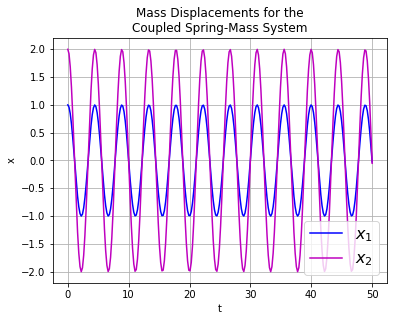

In [3]:
#Graficamos la solución

import numpy 
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, xy, x2, y2, er1, er2 = loadtxt('ejemplo2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1.5

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'm', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Mass Displacements for the\nCoupled Spring-Mass System')
savefig('Ejemplo2.1_pt1.png', dpi=100)

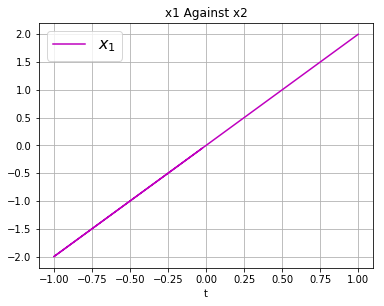

In [4]:
#Siguiente gráfica 

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
#Estas bibliotecas van a crearme una imagen en otra pestaña, para hacer que la imagen aparezca dentro del mismo documento que estamos programando agregamos
%matplotlib inline

t, x1, xy, x2, y2, e1, e2 = loadtxt('ejemplo2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1.5

plot(x1, x2, 'm', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('x1 Against x2')
savefig('ejemplo2.1_p2.png', dpi=100)

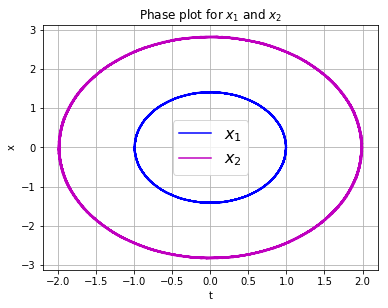

In [5]:
#Graficamos la solución

import numpy 
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x1, xy, x2, y2, er1, er2 = loadtxt('ejemplo2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
ylabel('x')
grid(True)
lw = 1.5

plot(x1, xy, 'b', linewidth=lw)
plot(x2, y2, 'm', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Phase plot for $x_1$ and $x_2$')
savefig('Ejemplo2.1_pt3.png', dpi=100)

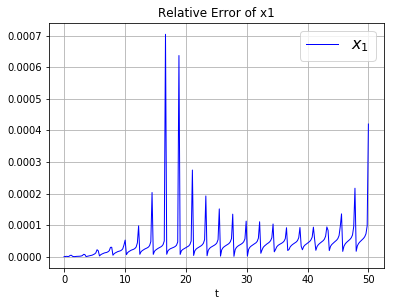

In [10]:
#El error del resultado numérico obtenido en x1 es de:

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
#Estas bibliotecas van a crearme una imagen en otra pestaña, para hacer que la imagen aparezca dentro del mismo documento que estamos programando agregamos
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1
plot(t, e1, 'b', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Relative Error of x1')
savefig('error2.1_pt1.png', dpi=100)

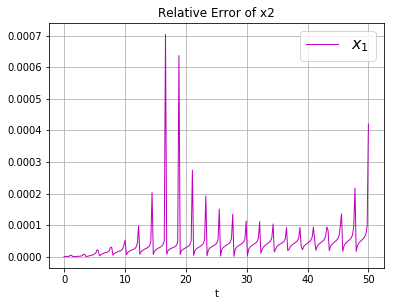

In [11]:
#El error del resultado numérico obtenido de x2 es de:

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
#Estas bibliotecas van a crearme una imagen en otra pestaña, para hacer que la imagen aparezca dentro del mismo documento que estamos programando agregamos
%matplotlib inline

t, x1, y1, x2, y2, e1, e2 = loadtxt('ejemplo2.1.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
#hold(True)
lw = 1
plot(t, e2, 'm', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Relative Error of x2')
savefig('error2.1_pt2.png', dpi=100)